In [1]:
%%javascript 
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import pandas as pd
import ipywidgets as widgets
import numpy as np

from matplotlib import pyplot as plt
from pathlib import Path

data_path = Path('data', 'clean')

In [3]:
# loading the data
data_file = Path(data_path, 'total_revenue.csv')
total_revenue = pd.read_csv(data_file)

In [4]:
# create an array with the delta value between row_index_x and row_index_y

def delta(df, row_index_x, row_index_y, label='Difference'):
    d = [label]
    for i in range(1, len(df.columns)):
        d.append(abs(df.iloc[row_index_x, i] - df.iloc[row_index_y, i]))
    
    return d

## Total Revenue in Value (£ million)

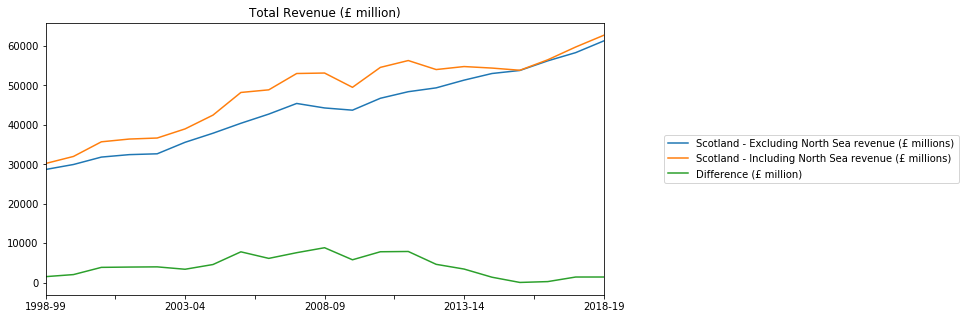

In [5]:
# Select only the revenue by values
values = total_revenue[0:2].copy().reset_index(drop=True)

# And add a delta between them
values.loc[len(values.index)] = delta(values, 0, 1, 'Difference (£ million)')

# swaping indexes
values_t = values.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (£ million)', color='black')
values_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

## Total Revenue in % of UK Revenue

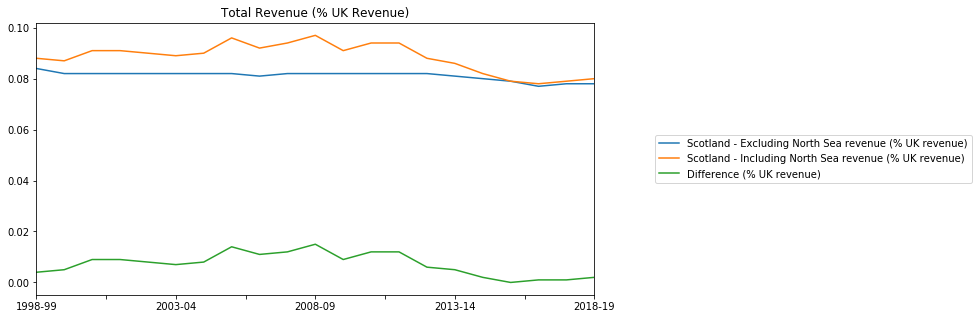

In [6]:
# only the revenue in Percent of the UK revenue
percent = total_revenue[2:4].copy().reset_index(drop=True)

# And add a delta between them
percent.loc[len(percent.index)] = delta(percent, 0, 1, 'Difference (% UK revenue)')

# Set the index and flip the dataset
percent_t = percent.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (% UK Revenue)', color='black')
percent_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

## Total Revenue in % of GDP

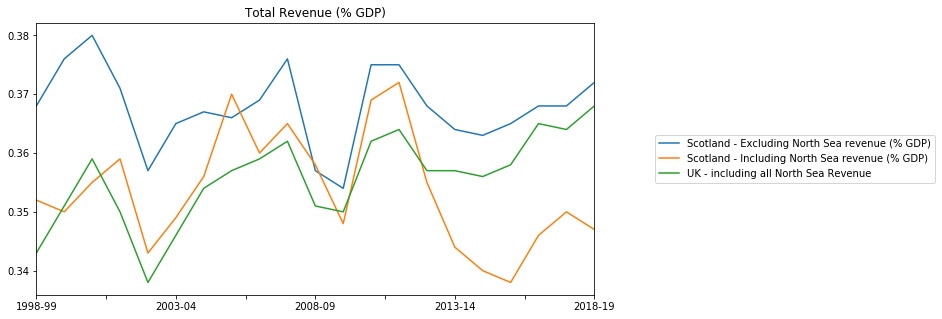

In [10]:
# select only the % of GDP
gdp = total_revenue[4:].copy().reset_index(drop=True)

gdp_t = gdp.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (% GDP)', color='black')
gdp_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

### Scotland view only

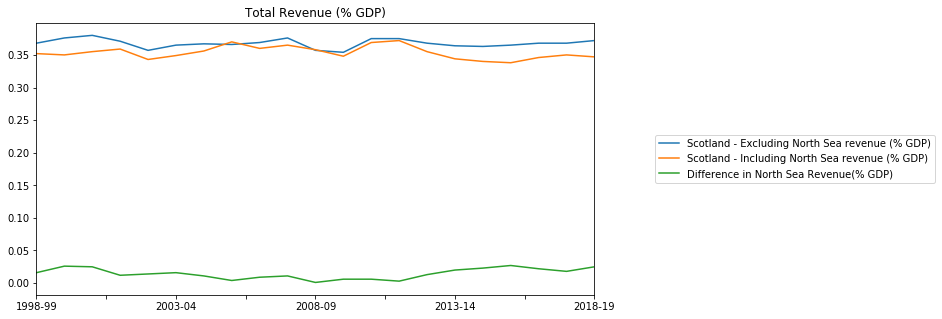

In [8]:
# select only the % of GDP
scotland_gdp = total_revenue.take([4,5]).copy().reset_index(drop=True)

# Add the delta between Scotland & UK revenue with and without North Sea revenue
scotland_gdp.loc[len(scotland_gdp.index)] = delta(scotland_gdp, 0, 1, 'Difference in North Sea Revenue(% GDP)')

scotland_gdp_t = scotland_gdp.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (% GDP)', color='black')
scotland_gdp_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

### Scotland vs UK (Including North Sea)

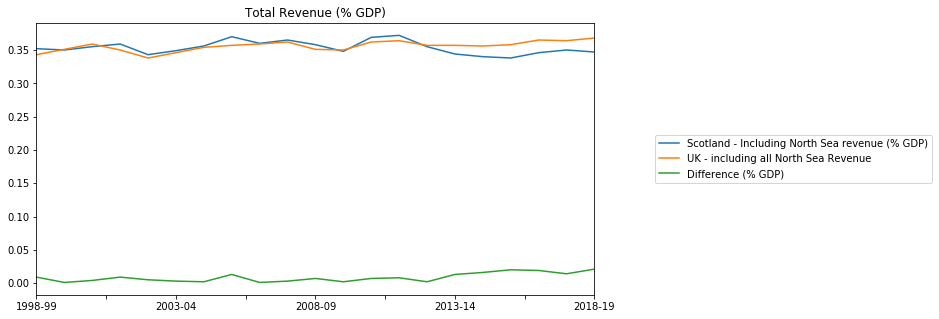

In [9]:
# select only the % of GDP
gdp_ins = total_revenue.take([5,6]).copy().reset_index(drop=True)

# Add the delta between Scotland & UK revenue with and without North Sea revenue
gdp_ins.loc[len(gdp_ins.index)] = delta(gdp_ins, 0, 1, 'Difference (% GDP)')

gdp_ins_t = gdp_ins.set_index('Period').transpose()

plt.rcParams['figure.figsize'] = (10,5)

f = plt.figure()
plt.title('Total Revenue (% GDP)', color='black')
gdp_ins_t.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()